In [1]:
# pip3 install auto-sklearn
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
)
import sklearn.model_selection
import autosklearn.regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

## Data Loading

Split한 데이터로 진행

In [2]:
# 데이터 불러오기
df = pd.read_csv('melb_split.csv')

# 데이터셋 분리
train_data = df[df['Split'] == 'Train']
test_data = df[df['Split'] == 'Test']

# 타겟 변수와 특성 분리
y_train = train_data['Price']
X_train = train_data.drop(['Price', 'Split', 'Address', 'BuildingArea', 'YearBuilt'], axis=1)

y_test = test_data['Price']
X_test = test_data.drop(['Price', 'Split', 'Address', 'BuildingArea', 'YearBuilt'], axis=1)

# 결과 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10864, 17), (10864,), (2716, 17), (2716,))

In [3]:
X_train.isnull().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                52
Landsize            0
CouncilArea      1122
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [4]:
X_train.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Brighton,3,h,S,Buxton,3/09/2016,11.2,3186.0,3.0,1.0,2.0,366.0,Bayside,-37.90380,145.00010,Southern Metropolitan,10579.0
1,Coburg,3,h,S,Brad,23/04/2016,7.8,3058.0,3.0,1.0,0.0,238.0,Moreland,-37.75390,144.96120,Northern Metropolitan,11204.0
2,Brunswick,3,h,S,Ray,27/05/2017,5.2,3056.0,3.0,1.0,1.0,439.0,Moreland,-37.77047,144.97005,Northern Metropolitan,11918.0
3,Carnegie,2,u,S,hockingstuart,4/06/2016,11.4,3163.0,2.0,1.0,2.0,0.0,Glen Eira,-37.88630,145.06600,Southern Metropolitan,7822.0
4,Altona,4,h,S,Greg,22/07/2017,11.0,3018.0,4.0,2.0,4.0,615.0,Hobsons Bay,-37.87057,144.83623,Western Metropolitan,5301.0


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 0 to 10863
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Rooms          10864 non-null  int64  
 2   Type           10864 non-null  object 
 3   Method         10864 non-null  object 
 4   SellerG        10864 non-null  object 
 5   Date           10864 non-null  object 
 6   Distance       10864 non-null  float64
 7   Postcode       10864 non-null  float64
 8   Bedroom2       10864 non-null  float64
 9   Bathroom       10864 non-null  float64
 10  Car            10812 non-null  float64
 11  Landsize       10864 non-null  float64
 12  CouncilArea    9742 non-null   object 
 13  Lattitude      10864 non-null  float64
 14  Longtitude     10864 non-null  float64
 15  Regionname     10864 non-null  object 
 16  Propertycount  10864 non-null  float64
dtypes: float64(9), int64(1), object(7)
memory usage: 1

## Build and fit a regressor

In [ ]:
import logging
logging.basicConfig(level=logging.DEBUG)
import joblib
import pickle 

tmp_folder="/data/ephemeral/home/Sojeong/level4-cv-finalproject-hackathon-cv-02-lv3/Sojeong/tmp/example_tmp"

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=180, # 전체 작업 시간 제한 (초 단위)
    per_run_time_limit=30, # 각 모델의 시간 제한 (초 단위)
    tmp_folder=tmp_folder,
    seed = 42,
    #ensemble_size = 50,
    #n_jobs = -1, # 모든 코어 사용
    # load_models = False,
)
model = automl.fit(X_train, y_train, dataset_name="melb")


# 학습 후 모델 저장
#joblib.dump(automl, "autosklearn_model.pkl")
# pickle로 저장
with open("autosklearn_model.pkl", "wb") as f:
     pickle.dump(automl, f)

# # 저장된 모델 복원
# loaded_model = joblib.load("autosklearn_model.pkl")
# # 복원된 모델로 예측
# test_predictions = loaded_model.predict(X_test)

/data/ephemeral/conda_envs/sklearn-env/lib/python3.9/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Suburb has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/data/ephemeral/conda_envs/sklearn-env/lib/python3.9/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Type has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/data/ephemeral/conda_envs/sklearn-env/lib/python3.9/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Method has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/data/ephemeral/conda_envs/sklearn-env/lib/python3.9/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Col

[WARNING] [2025-01-21 05:50:05,579:Client-EnsembleBuilder] No runs were available to build an ensemble from


## View the models found by auto-sklearn

In [7]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
12           1             0.52  gradient_boosting  0.239178   8.446128
6            2             0.34                mlp  0.261026  17.753122
3            3             0.12  gradient_boosting  0.264774  12.405389
11           4             0.02  gradient_boosting  0.279075   6.270673


## Print the final ensemble constructed by auto-sklearn

In [8]:
pprint(automl.show_models(), indent=4)
# cost : 1 - R²
# HistGradientBoostingRegressor
'''
l2_regularization=3.1008e-10: L2 정규화 강도(과적합 방지).
learning_rate=0.974: 학습률.
max_iter=512: 최대 학습 반복 횟수.
max_leaf_nodes=76: 트리의 최대 잎 노드 개수.
min_samples_leaf=8: 잎 노드에 있어야 하는 최소 샘플 수.
validation_fraction=0.085: 검증 세트로 사용할 데이터 비율.
warm_start=True: 이전 학습 상태를 재사용해 학습 가속화.
'''

{   3: {   'cost': 0.2647736395994248,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f114c6855b0>,
           'ensemble_weight': 0.12,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f119d0e76d0>,
           'model_id': 3,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f119d0e7040>,
           'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=5.997418027353535e-10,
                              learning_rate=0.12286466971783992, max_iter=512,
                              max_leaf_nodes=26, min_samples_leaf=8,
                              n_iter_no_change=0, random_state=42,
                              validation_fraction=None, warm_start=True)},
    6: {   'cost': 0.26102598011779277,
           'data_preprocessor': <autosklearn.pipeline.co

'\nl2_regularization=3.1008e-10: L2 정규화 강도(과적합 방지).\nlearning_rate=0.974: 학습률.\nmax_iter=512: 최대 학습 반복 횟수.\nmax_leaf_nodes=76: 트리의 최대 잎 노드 개수.\nmin_samples_leaf=8: 잎 노드에 있어야 하는 최소 샘플 수.\nvalidation_fraction=0.085: 검증 세트로 사용할 데이터 비율.\nwarm_start=True: 이전 학습 상태를 재사용해 학습 가속화.\n'

In [9]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: melb
  Metric: r2
  Best validation score: 0.760822
  Number of target algorithm runs: 13
  Number of successful target algorithm runs: 5
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 4



## Get the Score of the final ensemble

In [11]:
import joblib
# 저장된 모델 복원
loaded_model = joblib.load("autosklearn_model.pkl")
# 복원된 모델로 예측
train_predictions = loaded_model.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = loaded_model.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.8964286929311234
Test R2 score: 0.8025685162373855


In [12]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.8964286929311234
Test R2 score: 0.8025685162373855


In [13]:
X_train.shape

(10864, 17)

In [14]:
# Train 데이터 저장
train_data = pd.DataFrame(X_train, columns=X_train.columns)
train_data["Actual"] = y_train
train_data["Predicted"] = train_predictions
train_data.to_csv("train_predictions.csv", index=False)
print("Train predictions saved to 'train_predictions.csv'")

# Test 데이터 저장
test_data = pd.DataFrame(X_test, columns=X_test.columns)
test_data["Actual"] = y_test
test_data["Predicted"] = test_predictions
test_data.to_csv("test_predictions.csv", index=False)
print("Test predictions saved to 'test_predictions.csv'")

Train predictions saved to 'train_predictions.csv'
Test predictions saved to 'test_predictions.csv'


In [15]:
# 평가 함수 정의
def evaluate_regression(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nEvaluation for {dataset_name}:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_true, y_pred, squared=False):.4f}")

# Train 
# 데이터 평가
evaluate_regression(y_train, train_predictions, "Train Data")

# Test 데이터 평가
evaluate_regression(y_test, test_predictions, "Test Data")


Evaluation for Train Data:
R2 Score: 0.8964
Mean Absolute Error (MAE): 123787.6962
Mean Squared Error (MSE): 42619196053.8794
Root Mean Squared Error (RMSE): 206444.1718

Evaluation for Test Data:
R2 Score: 0.8026
Mean Absolute Error (MAE): 174826.0709
Mean Squared Error (MSE): 78465124410.8455
Root Mean Squared Error (RMSE): 280116.2695


## Plot the predictions

In [16]:
nan_count = np.isnan(train_predictions).sum()
print(f"Number of NaN values in train_predictions: {nan_count}")

Number of NaN values in train_predictions: 0


In [17]:
print("Train predictions range:", train_predictions.min(), "-", train_predictions.max())
print("Test predictions range:", test_predictions.min(), "-", test_predictions.max())
print("y_train range:", y_train.min(), "-", y_train.max())
print("y_test range:", y_test.min(), "-", y_test.max())

Train predictions range: 174059.32177734375 - 7436868.203125
Test predictions range: 214207.5556640625 - 4086977.640625
y_train range: 85000.0 - 9000000.0
y_test range: 185000.0 - 5600000.0


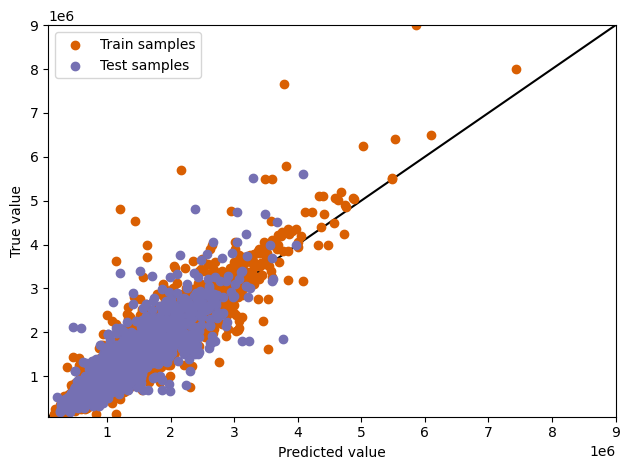

In [18]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()

# 범위 지정: x축은 예측값, y축은 실제값 기준
plt.xlim([75000, 9000000])  # x축 범위 (train_predictions, test_predictions에 맞춤)
plt.ylim([75000, 9000000])  # y축 범위 (y_train, y_test에 맞춤)

# 대각선 표시 (예측값 = 실제값 선)
plt.plot([75000, 9000000], [75000, 9000000], c="k", zorder=0)

plt.tight_layout()
plt.show()

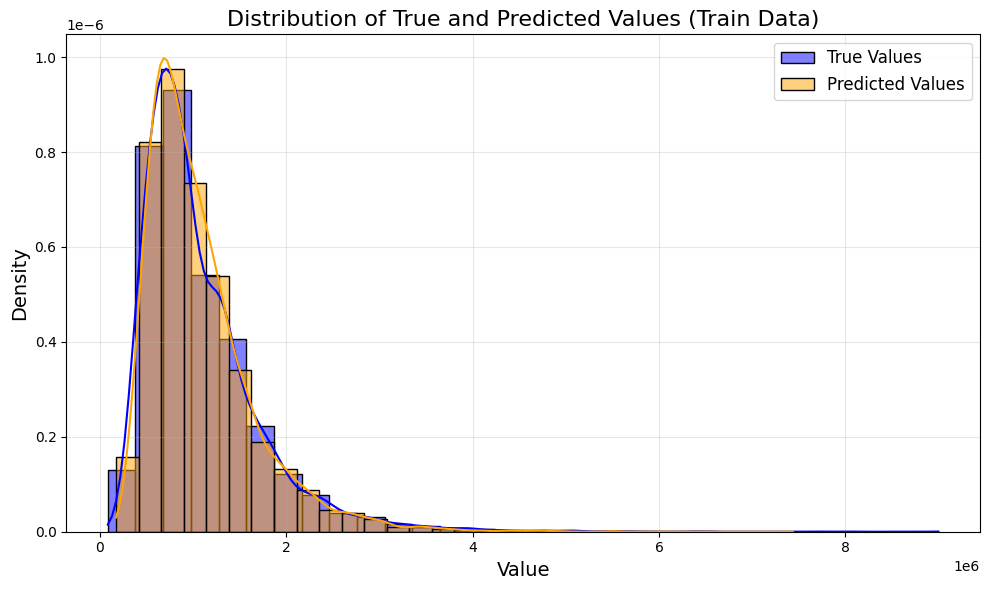

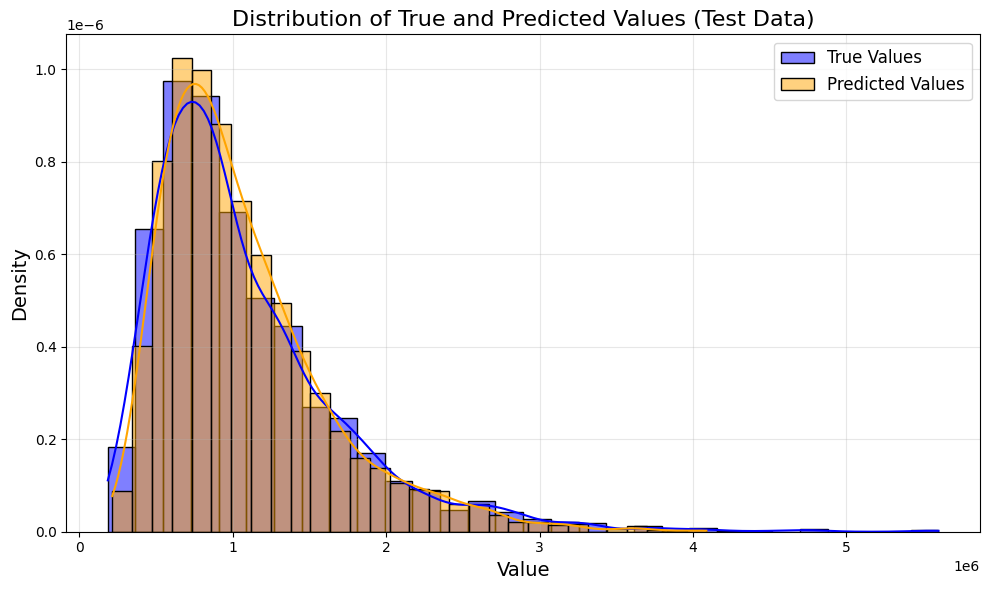

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포 비교 함수 정의
def plot_distribution(y_true, y_pred, dataset_name="Dataset"):
    plt.figure(figsize=(10, 6))
    
    # 히스토그램 및 커널 밀도 추정 (KDE)
    sns.histplot(y_true, label="True Values", color="blue", kde=True, stat="density", bins=30, alpha=0.5)
    sns.histplot(y_pred, label="Predicted Values", color="orange", kde=True, stat="density", bins=30, alpha=0.5)
    
    # 그래프 꾸미기
    plt.title(f"Distribution of True and Predicted Values ({dataset_name})", fontsize=16)
    plt.xlabel("Value", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Train 데이터 분포 비교
plot_distribution(y_train, train_predictions, "Train Data")

# Test 데이터 분포 비교
plot_distribution(y_test, test_predictions, "Test Data")